In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
directory = "/content/gdrive/MyDrive/BrainTumorDataset"

In [ ]:
def load_data(directory, extension):
  mat_files = []
  files = os.listdir(directory)
  count_files = 0

  for i, file in enumerate(files, start=1):
    if i % 10 == 0:
      sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'.format(i, len(files), i / float(len(files)) * 100))
      sys.stdout.flush()
    
    mat_file = h5py.File(os.path.join(directory,file),"r")
    mat_files.append(mat_file)
    count_files += 1

  print('\nTotal files read: ', count_files)
  return mat_files

In [ ]:
mat_files = load_data(directory, ".mat")

[3060/3064] images loaded: 99.9 %
Total files read:  3064


In [ ]:
first_file = mat_files[0]
print(first_file.keys())
print(first_file['cjdata']['image'])
print(first_file['cjdata']['label'])
print('Label:', int(first_file['cjdata']['label'][()]))

<KeysViewHDF5 ['cjdata']>
<HDF5 dataset "image": shape (512, 512), type "<i2">
<HDF5 dataset "label": shape (1, 1), type "<f8">
Label: 2


In [ ]:
def transform_data(mat_files, image_dimension):
  images = []
  labels = []
  for i, mat_file in enumerate(mat_files, start=1):
    image = cv2.resize(mat_file['cjdata']['image'][()], dsize=(image_dimension, image_dimension),
                       interpolation=cv2.INTER_CUBIC)
    label = int(mat_file['cjdata']['label'][()])
    images.append(image)
    labels.append(label)
    sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'.format(i, len(mat_files), i / float(len(mat_files)) * 100))
    sys.stdout.flush()

  images = np.array(images)
  labels = np.array(labels)
  print('\nimages:', images.shape)
  print('labels:', labels.shape)

  return images, labels   

In [ ]:
images, labels = transform_data(mat_files, 512)

[3064/3064] images loaded: 100.0 %
images: (3064, 512, 512)
labels: (3064,)


**Data Analysis and Visualisation**

number of 1: meningioma: 708
number of 2: glioma: 1426
number of 3: pituitary tumor: 930


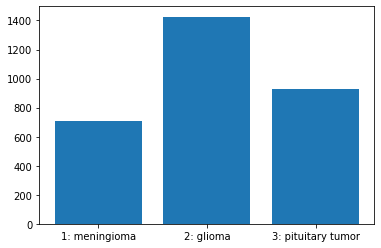

In [ ]:
integer_to_class = {'1': '1: meningioma', '2': '2: glioma', '3': '3: pituitary tumor'}
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts, tick_label=['1: meningioma', '2: glioma', '3: pituitary tumor'])

for i, idx in enumerate(classes):
    print('number of {}: {}'.format(integer_to_class[str(idx)], counts[i]))

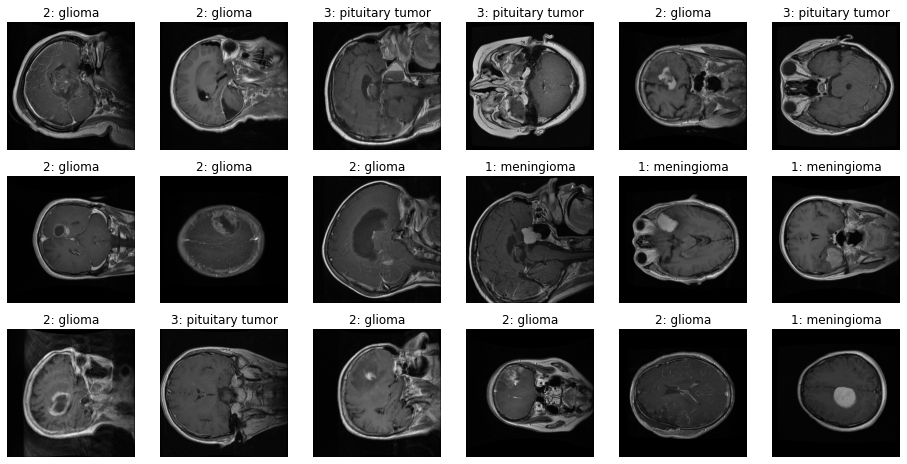

In [ ]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')